<a href="https://colab.research.google.com/github/Al3x0906/BreastCancer/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [53]:
df = pd.read_csv("./drive/MyDrive/datasets/breast_cancer.csv")

In [54]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [55]:
df= df.drop(['Unnamed: 32'],axis=1)

In [56]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


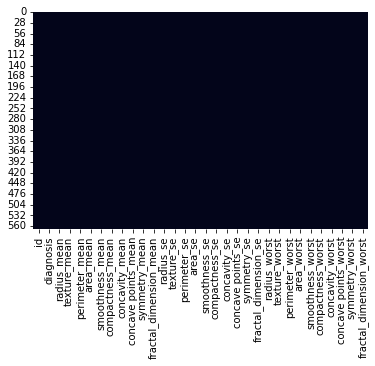

In [57]:
sns.heatmap(df.isnull(),cbar=False)

In [58]:
df['diagnosis'].replace({'M':1,'B':2},inplace=True)

In [59]:
df_corr = df.corr()
df.keys

<bound method NDFrame.keys of            id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          2         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.2776

In [60]:
corr_target = abs(df_corr['diagnosis'])
features = corr_target[corr_target>=0.5]
features = features.keys()
features = features.delete(0)
features = features.tolist()
features

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

In [61]:
X=df[features]

In [62]:
y=df['diagnosis']

In [63]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from catboost import CatBoostClassifier
from sklearn.svm import LinearSVC

In [65]:
def process(clf , X_train=X_train , X_test=X_test , y_train=y_train , y_test=y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred) * 100
  confusion = confusion_matrix(y_test, y_pred)
  precision = confusion[0][0]/(confusion[0][0] + confusion[1][0]) * 100
  recall = confusion[0][0]/(confusion[0][0] + confusion[0][1]) * 100
  f1_score = ((2 * precision * recall) / (precision + recall)) / 100

  accuracys.append(accuracy)
  recalls.append(recall)
  precisions.append(precision)
  f1_scores.append(f1_score)


In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC , SVR
from sklearn.tree import DecisionTreeClassifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression(C=63)
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='soft')

In [68]:
algo=[ 
      SVC(gamma=0.01),
      SVC(kernel="poly", degree=2, coef0=1, C=60),
      LinearSVC(C=50, loss="hinge"),
      XGBClassifier() ,
      RandomForestClassifier() ,
      LogisticRegression(C=63) ,
      DecisionTreeClassifier(criterion='entropy', max_depth=30),
      AdaBoostClassifier(),
      GradientBoostingClassifier(),
      BaggingClassifier(),
      CatBoostClassifier(),
      DecisionTreeClassifier()  ]

In [69]:
accuracys=[]
recalls=[]
precisions=[]
f1_scores=[]
for clf in algo :
 process(clf)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Learning rate set to 0.00736
0:	learn: 0.6807148	total: 4.64ms	remaining: 4.63s
1:	learn: 0.6698455	total: 9.39ms	remaining: 4.69s
2:	learn: 0.6589972	total: 13.4ms	remaining: 4.44s
3:	learn: 0.6476461	total: 20.1ms	remaining: 5s
4:	learn: 0.6381245	total: 27.8ms	remaining: 5.53s
5:	learn: 0.6260044	total: 36.3ms	remaining: 6.02s
6:	learn: 0.6156785	total: 40.5ms	remaining: 5.75s
7:	learn: 0.6055869	total: 44.6ms	remaining: 5.53s
8:	learn: 0.5950050	total: 48.5ms	remaining: 5.34s
9:	learn: 0.5840199	total: 52.6ms	remaining: 5.2s
10:	learn: 0.5745707	total: 56.6ms	remaining: 5.09s
11:	learn: 0.5648258	total: 60.9ms	remaining: 5.01s
12:	learn: 0.5561204	total: 64.8ms	remaining: 4.92s
13:	learn: 0.5485065	total: 68.9ms	remaining: 4.86s
14:	learn: 0.5404139	total: 72.9ms	remaining: 4.79s
15:	learn: 0.5308633	total: 76.9ms	remaining: 4.73s
16:	learn: 0.5209410	total: 81.2ms	remaining: 4.69s
17:	learn: 0.5120617	total: 87.3ms	remaining: 4.76s
18:	learn: 0.5035260	total: 91.7ms	remaining: 4.7

In [70]:
Metric = pd.DataFrame({
    
    'Algorithm' : algo,
    'Accuracy': accuracys,
    'Recall': recalls,
    'Precision': precisions,
    'F1_score' :f1_scores
}
)
Metric

,Algorithm,Accuracy,Recall,Precision,F1_score
0,SVC(gamma=0.01),63.157895,2.325581,100.000000,0.045455
1,"SVC(C=60, coef0=1, degree=2, kernel='poly')",96.491228,90.697674,100.000000,0.951220
2,"LinearSVC(C=50, loss='hinge')",92.982456,100.000000,84.313725,0.914894
3,XGBClassifier(),95.614035,93.023256,95.238095,0.941176
4,"(DecisionTreeClassifier(max_features='auto', r...",95.614035,93.023256,95.238095,0.941176
5,LogisticRegression(C=63),99.122807,97.674419,100.000000,0.988235
6,"DecisionTreeClassifier(criterion='entropy', ma...",94.736842,90.697674,95.121951,0.928571
7,"(DecisionTreeClassifier(max_depth=1, random_st...",95.614035,93.023256,95.238095,0.941176
8,([DecisionTreeRegressor(criterion='friedman_ms...,95.614035,93.023256,95.238095,0.941176
9,(DecisionTreeClassifier(random_state=175177036...,94.736842,90.697674,95.121951,0.928571


In [71]:
svc_g=SVC(gamma=0.01,probability=True)
svc_k= SVC(kernel="poly", degree=2, coef0=1, C=60,probability=True)
##l_svc= LinearSVC(C=50, loss="hinge")
XGBC=  XGBClassifier() 
rand=  RandomForestClassifier() 
log=  LogisticRegression(C=63) 
dec= DecisionTreeClassifier(criterion='entropy', max_depth=30)
Ada= AdaBoostClassifier()
GBC= GradientBoostingClassifier()
Bagging=BaggingClassifier()
Cat=CatBoostClassifier()
Dec=DecisionTreeClassifier()

In [72]:
clf = VotingClassifier(
estimators=[('svc_g',svc_g),('svc_k',svc_k),('XGBC',XGBC),('rand',rand),('log',log),('dec',dec),('Ada',Ada),('GBC',GBC),('Bagging',Bagging),('CAT',Cat)],
voting='soft')

In [73]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
confusion = confusion_matrix(y_test, y_pred)
precision = confusion[0][0]/(confusion[0][0] + confusion[1][0]) * 100
recall = confusion[0][0]/(confusion[0][0] + confusion[0][1]) * 100
f1_score = ((2 * precision * recall) / (precision + recall)) / 100

accuracy,precision,recall,f1_score

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Learning rate set to 0.00736
0:	learn: 0.6807148	total: 4.07ms	remaining: 4.06s
1:	learn: 0.6698455	total: 8.34ms	remaining: 4.16s
2:	learn: 0.6589972	total: 14.2ms	remaining: 4.72s
3:	learn: 0.6476461	total: 18.2ms	remaining: 4.54s
4:	learn: 0.6381245	total: 22.1ms	remaining: 4.4s
5:	learn: 0.6260044	total: 26.1ms	remaining: 4.32s
6:	learn: 0.6156785	total: 30.2ms	remaining: 4.29s
7:	learn: 0.6055869	total: 34ms	remaining: 4.21s
8:	learn: 0.5950050	total: 37.8ms	remaining: 4.16s
9:	learn: 0.5840199	total: 41.9ms	remaining: 4.15s
10:	learn: 0.5745707	total: 46ms	remaining: 4.13s
11:	learn: 0.5648258	total: 50.1ms	remaining: 4.12s
12:	learn: 0.5561204	total: 53.6ms	remaining: 4.07s
13:	learn: 0.5485065	total: 57.5ms	remaining: 4.05s
14:	learn: 0.5404139	total: 61.3ms	remaining: 4.03s
15:	learn: 0.5308633	total: 65.1ms	remaining: 4s
16:	learn: 0.5209410	total: 69.1ms	remaining: 4s
17:	learn: 0.5120617	total: 72.7ms	remaining: 3.97s
18:	learn: 0.5035260	total: 77ms	remaining: 3.98s
19:	le

(95.6140350877193, 95.23809523809523, 93.02325581395348, 0.9411764705882352)